In [1]:
from qtl_control.qtl_simple_experiments.experiments.base import start_station

import numpy as np

station = start_station(
    config="config_test.yaml",
    db_path="",
    db_name="test_simple_station_1_1"
)

2025-07-01 18:08:34,499 - qm - INFO     - Starting session: 1fd1ff84-3e68-4d15-ac71-c4808627f63f
2025-07-01 18:08:36,901 - qm - INFO     - Performing health check
2025-07-01 18:08:36,907 - qm - INFO     - Health check passed
Opened DB with last id: 147


In [2]:
station.reload_config(["Q6"], {
    "Q6": {
        "frequency": 4.6131147e9,
        "drive": {
            "LO_frequency": 4800000000,
        },
        "readout_amplitude": 0.105,
        "readout_frequency": 6.7034e9,
        "X180_amplitude": 0.15490563821966896,
        "readout_len": 5000
    },
    "PL": {
        "LO_frequency": 6900000000
    }
})

In [3]:
station.print_tree()

Q6:
	drive:
		channel_id: RF4
		LO_frequency: 4800000000
		gain: -20
	frequency: 4613114700.0
	X180_duration: 100
	X180_amplitude: 0.15490563821966896
	flux: None
	readout_frequency: 6703400000.0
	readout_amplitude: 0.105
	readout_len: 5000
	readout_discriminator: None
PL:
	input:
		channel_id: RF1
		LO_frequency: 6900000000
		gain: -20
	output:
		channel_id: RF_1_in
		LO_frequency: 6900000000
		gain: 0
	LO_frequency: 6900000000


In [5]:
from qtl_control.qtl_simple_experiments.experiments.resonator_experiments import ReadoutResonatorSpectroscopy
rrs = ReadoutResonatorSpectroscopy()

qubit = "Q6"
f0 = station.full_config[qubit].readout_frequency
span = 2.5e6# 2.5e6
delta_f = 0.002e6# 0.002e6

exp_res = rrs.run(qubit, [
    np.arange(f0-span/2, f0+span/2, delta_f)
])

2025-07-01 17:51:58,588 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 17:51:58,676 - qm - INFO     - Executing program
Execution report for job 1748815112121
No errors
Progress: [##################################################] 100.0% (n=1024/1024) --> elapsed time: 7.92s
Progress: [##################################################] 100.0% (n=1024/1024) --> elapsed time: 7.94s
Saved with ID 142


array([<Axes: ylabel='$Magnitude, \\ |S|$ (V)'>,
       <Axes: xlabel='readout_frequency [Hz]', ylabel='$Phase \\ S$ (rad)'>],
      dtype=object)

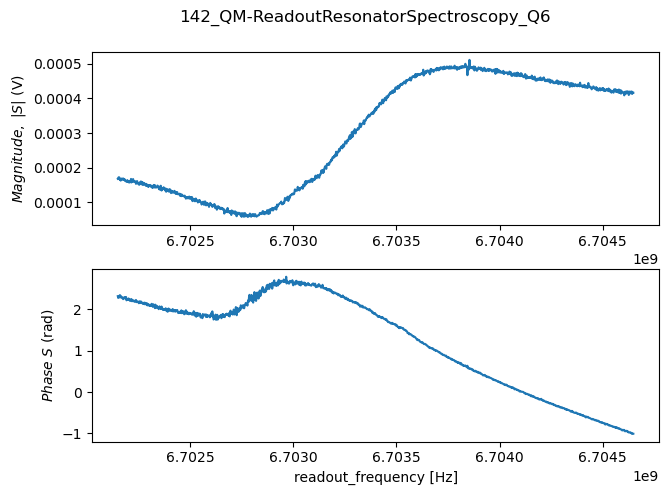

In [6]:
exp_res.mag_phase_plot()

In [ ]:
from qtl_control.qtl_simple_experiments.experiments import Rabi
rabi = Rabi()
res = rabi.run("Q6", [np.arange(-0.3, 0.3, 0.005)], Navg=1024 * 4)

2025-07-01 18:08:40,756 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 18:08:40,890 - qm - INFO     - Executing program
Execution report for job 1748815112127
No errors
Progress: [##################################################] 100.0% (n=4096/4096) --> elapsed time: 27.21s
Progress: [##################################################] 100.0% (n=4096/4096) --> elapsed time: 27.24s
Progress: [##################################################] 100.0% (n=4096/4096) --> elapsed time: 27.26s
Saved with ID 148


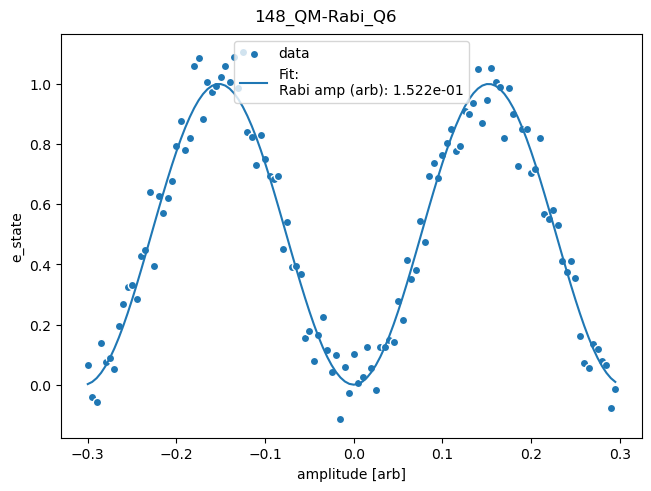

In [4]:
new_vals = res.analyze(rabi_amp=0.15)

In [5]:
new_vals

{'Q6': {'X180_amplitude': np.float64(0.15217350651218947),
  'readout_discriminator': ReadoutDisc(param_0=np.complex128(-0.00013328911769280822+0.00035435513428465186j), param_1=np.complex128(14892.72283945985-23366.188145170923j))}}

In [6]:
station.reload_config(["Q6"], new_vals)
station.print_tree()

Q6:
	drive:
		channel_id: RF4
		LO_frequency: 4800000000
		gain: -20
	frequency: 4613114700.0
	X180_duration: 100
	X180_amplitude: 0.15217350651218947
	flux: None
	readout_frequency: 6703400000.0
	readout_amplitude: 0.105
	readout_len: 5000
	readout_discriminator:
		param_0: (-0.00013328911769280822+0.00035435513428465186j)
		param_1: (14892.72283945985-23366.188145170923j)
PL:
	input:
		channel_id: RF1
		LO_frequency: 6900000000
		gain: -20
	output:
		channel_id: RF_1_in
		LO_frequency: 6900000000
		gain: 0
	LO_frequency: 6900000000


In [ ]:
from qtl_control.qtl_simple_experiments.experiments import T1
t1 = T1()
res = t1.run("Q6", [np.arange(-0.3, 0.3, 0.005)], Navg=1024)


In [30]:
station.reload_config(["Q6"], {
    "Q6": {
        "frequency": 4.6131147e9,
        "drive": {
            "LO_frequency": 4800000000,
        },
        "readout_amplitude": 0.105,
        "readout_frequency": 6.7034e9, # 6702766000 + 1e4,
        "X180_amplitude": 0.15058446205671946,
        "readout_len": 5000
    },
    "PL": {
        "LO_frequency": 6900000000
    }
})
from qtl_control.qtl_simple_experiments.experiments.qubit_experiments import ReadoutOptimization
ropt = ReadoutOptimization()

f0 = 6.7034e9
N = 1024
res = ropt.run("Q6", [
    np.arange(1, 1+N, 1),
    np.arange(f0 - 1e6, f0 + 1e6, 1e5, dtype=int),
    np.arange(0.08, 0.17, 0.005),
    np.array(["ground", "excited"]),
], Navg=N)


2025-07-01 12:55:08,860 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 12:55:09,124 - qm - INFO     - Executing program
Saved with ID 96


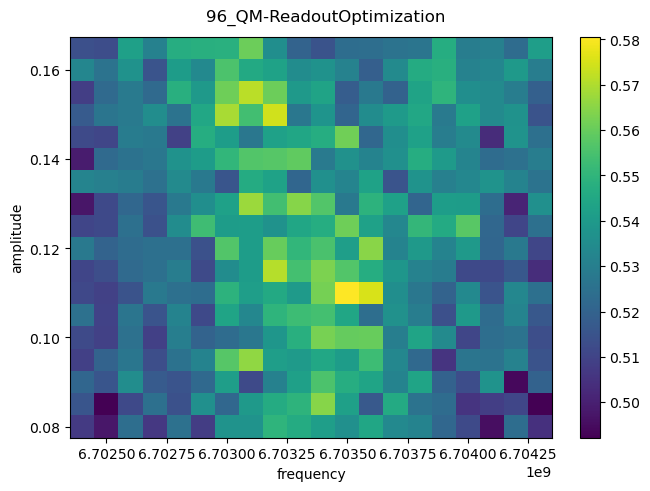

In [31]:
res.analyze()

In [16]:
import matplotlib.pyplot as plt
import xarray as xr
def analyze_data(self, result):
    res_data = result.data
    fig, ax = plt.subplots(constrained_layout=True)
    fig.suptitle(f"{result.id}_{self.experiment_name}")

    fids = np.empty((len(res_data["frequency"].values), len(res_data["amplitude"].values)))

    for i, ro_f in enumerate(res_data["frequency"]):
        for j, ro_a in enumerate(res_data["amplitude"]):
            dataslice = res_data.sel(amplitude=ro_a, frequency=ro_f)
            g_mean = dataslice.sel(state="ground")["iq"].mean()
            e_mean = dataslice.sel(state="excited")["iq"].mean()

            dist_to_g = np.abs(dataslice["iq"] - g_mean)
            dist_to_e = np.abs(dataslice["iq"] - e_mean)

            disc_data = np.where(dist_to_e < dist_to_g, 1, 0)
            dataslice["discriminated"] = xr.DataArray(disc_data, coords={
                "iteration": dataslice["iteration"].values,
                "state": dataslice["state"].values
            }, dims=["iteration", "state"])
            N = len(dataslice["iteration"].values)
            
            fid = 0.5 * (
                int(dataslice["discriminated"].sel(state="excited").sum())/N +
                (N - int(dataslice["discriminated"].sel(state="ground").sum()))/N
            )

            fids[i][j] = fid

    fid_ds = xr.DataArray(
        fids, coords={"frequency": res_data["frequency"].values, "amplitude": res_data["amplitude"].values},
        dims=["frequency", "amplitude"]
    )
    fid_ds.plot(ax=ax, x="frequency")
ReadoutOptimization.analyze_data = analyze_data

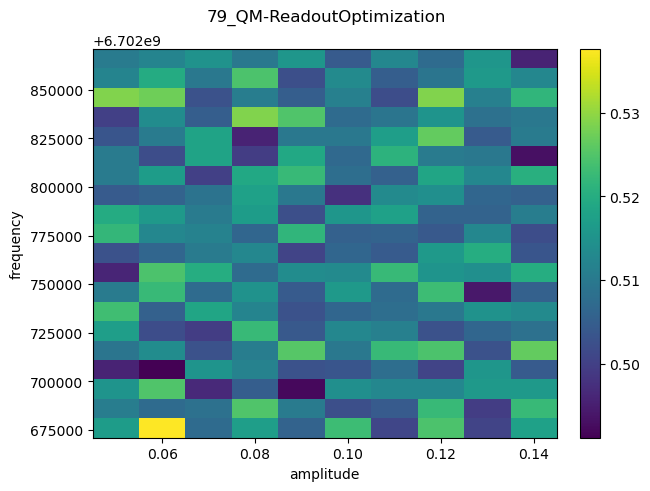

In [58]:
res.analyze()

ValueError: x and y can be no greater than 2D, but have shapes (1024, 20, 10, 2) and (1024, 20, 10, 2)

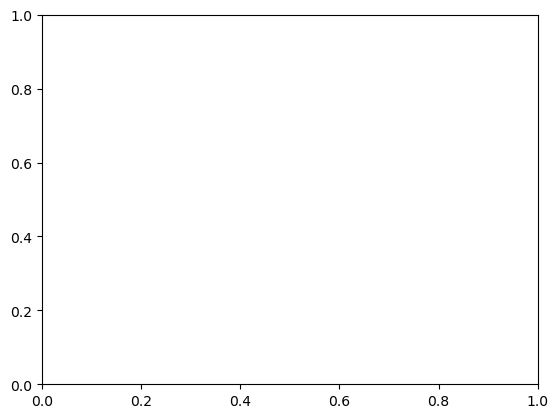

In [7]:
import matplotlib.pyplot as plt
plt.plot(
    res.data["iq"].real,
    res.data["iq"].imag
)

In [54]:
from qtl_control.qtl_simple_experiments.experiments.qubit_experiments import Ramsey2F

r2f = Ramsey2F()
res = r2f.run("Q6", [
    np.array([-1e6, 1e6]),
    np.arange(4, 4 + 40 * 60, 40)
], Navg=1024 * 2, wait_after=50000)

2025-07-01 11:59:15,769 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 11:59:15,929 - qm - INFO     - Executing program
Execution report for job 1748815112051
No errors
Progress: [##################################################] 100.0% (n=2048/2048) --> elapsed time: 13.15s
Progress: [##################################################] 100.0% (n=2048/2048) --> elapsed time: 13.19s
Saved with ID 78


<xarray.DataArray 'detuning' ()> Size: 8B
array(4.61308212e+09)

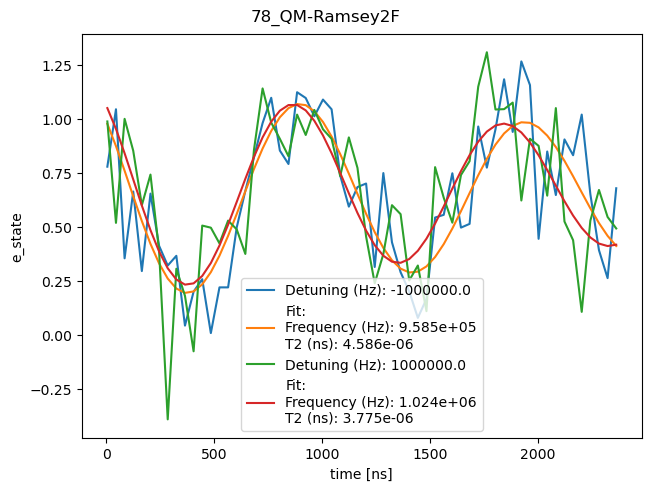

In [55]:
res.analyze(element="Q6")

In [36]:
station.reload_config(["Q3"], {
    "Q3": {
        "frequency": 5.1205e9,
        "drive": {
            "LO_frequency": 5.3e9,
        },
        "readout_amplitude": 0.15,
        "readout_frequency": 6984902000.0,
        "flux": {
            "dc_volt": 0
        } 
    },
    "PL": {
        "LO_frequency": 7.1e9
    }
})

In [6]:
station.reload_config(["Q3", "Q4"], {
    "Q4": {
        "frequency": 5.085e9,
        "drive": {
            "LO_frequency": 5.2e9,
        },
        "readout_amplitude": 0.1,
        "readout_frequency": 7.143100000e9,
        "flux": {
            "dc_volt": 0.14 # At0 
        },
        "readout_len": 5000
    },
    "Q3": {
        "frequency": 5.1205e9,
        "drive": {
            "LO_frequency": 5.3e9,
        },
        "readout_amplitude": 0.1,
        "readout_frequency": 6984914000,
        "readout_len": 5000,
        "flux": {
            "dc_volt": -0.1
        },
        "X180_amplitude": 0.15514954015263197
    },
    "PL": {
        "input": {
           "LO_frequency": 6900000000
        },
        "output":{
            "LO_frequency": 6900000000
        }
    }
})

In [7]:
station.print_tree()

Q3:
	drive:
		channel_id: RF3
		LO_frequency: 5300000000.0
		gain: -20
	flux:
		channel_id: AO9
		dc_volt: -0.1
	frequency: 5120500000.0
	readout_frequency: 6984914000
	X180_duration: 100
	X180_amplitude: 0.15514954015263197
	readout_amplitude: 0.1
	readout_len: 5000
Q4:
	drive:
		channel_id: RF2
		LO_frequency: 5200000000.0
		gain: -20
	flux:
		channel_id: AO10
		dc_volt: 0.14
	frequency: 5085000000.0
	readout_frequency: 7143100000.0
	X180_duration: 100
	X180_amplitude: 0.5
	readout_amplitude: 0.1
	readout_len: 5000
PL:
	input:
		channel_id: RF1
		LO_frequency: 6900000000
		gain: -20
	output:
		channel_id: RF_1_in
		LO_frequency: 6900000000
		gain: 0
	LO_frequency: 7100000000


In [5]:
# station.rf_output_channels["RF1"]["LO_frequency"] = 7e9
station.analog_output_channels

{'AO9': OPXAnalog(dc_volt=-0.01), 'AO10': OPXAnalog(dc_volt=0)}

In [5]:
station.get_settings()

{'RF_1_in': OctaveRF(LO_frequency=6000000000.0, gain=0)}
{'RF1': OctaveRF(LO_frequency=6000000000.0, gain=-20), 'RF2': OctaveRF(LO_frequency=6000000000.0, gain=-20), 'RF3': OctaveRF(LO_frequency=6000000000.0, gain=-20), 'RF4': OctaveRF(LO_frequency=6000000000.0, gain=-20)}
{'AO9': OPXAnalog(dc_volt=0), 'AO10': OPXAnalog(dc_volt=0)}
{'PL': ProbeLine(input='RF1', output='RF_1_in', LO_frequency=6000000000.0)}
{'Q3': TransmonQubit(drive='RF3', flux='AO9', frequency=5800000000.0, readout_frequency=5800000000.0, X180_duration=100, X180_ampliutude=0.5, readout_amplitude=0.1, readout_len=2000), 'Q4': TransmonQubit(drive='RF2', flux='AO10', frequency=5800000000.0, readout_frequency=5800000000.0, X180_duration=100, X180_ampliutude=0.5, readout_amplitude=0.1, readout_len=2000), 'Q7': TransmonQubit(drive='RF4', flux=None, frequency=5800000000.0, readout_frequency=5800000000.0, X180_duration=100, X180_ampliutude=0.5, readout_amplitude=0.1, readout_len=2000)}


In [6]:
from qtl_control.qtl_simple_experiments.experiments.resonator_experiments import ReadoutResonatorSpectroscopy
rrs = ReadoutResonatorSpectroscopy()

qubit = "Q6"
f0 = station.full_config[qubit].readout_frequency
span = 2.5e6# 2.5e6
delta_f = 0.002e6# 0.002e6

exp_res = rrs.run(qubit, [
    np.arange(f0-span/2, f0+span/2, delta_f)
])

2025-07-01 16:58:42,265 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 16:58:42,351 - qm - INFO     - Executing program
Execution report for job 1748815112113
Errors:
Please refer to section: Error Indications and Error Reporting in documentation for additional information

code		severity	message
10004		Error		Overflow error in update frequency of controller con1 - must be between -5e8 and 5e8
2025-07-01 16:58:42,436 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2025-07-01 16:58:42,551 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2025-07-01 16:58:42,563 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using job.execution_report() for more information
2025-07-01 16:58:42,574 - qm - ERROR    - Runtime errors were detected. Please fetch the execution report using jo

AttributeError: 'QTLQMSimpleStation' object has no attribute 'element_conn'

In [5]:
# exp_res.mag_phase_plot()
import matplotlib.pyplot as plt
res = exp_res.analyze()
plt.axvline(res)
# plt.axvline(res)

NameError: name 'exp_res' is not defined

In [134]:
res

6984914000.0

In [127]:
from qtl_control.qtl_simple_experiments.experiments.resonator_experiments import ReadoutFluxSpectroscopy
fluxspec = ReadoutFluxSpectroscopy()

qubit = "Q4"
f0 = station.element_conn[qubit].readout_frequency
span = 1.5e6

delta_f = 0.01e6
flux_0 = 0

exp_res = fluxspec.run(qubit, [
    np.arange(flux_0-0.4, flux_0+0.4, 0.02),
    np.arange(f0-span/2, f0+span/2, delta_f)
])



2025-07-01 14:17:32,471 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 14:17:32,604 - qm - INFO     - Executing program
Execution report for job 1748815112104
No errors
Progress: [##################################################] 100.0% (n=1024/1024) --> elapsed time: 38.26s
Progress: [##################################################] 100.0% (n=1024/1024) --> elapsed time: 38.28s
Saved with ID 129


array([<Axes: ylabel='readout_frequency [Hz]'>,
       <Axes: xlabel='amplitude [arb]', ylabel='readout_frequency [Hz]'>],
      dtype=object)

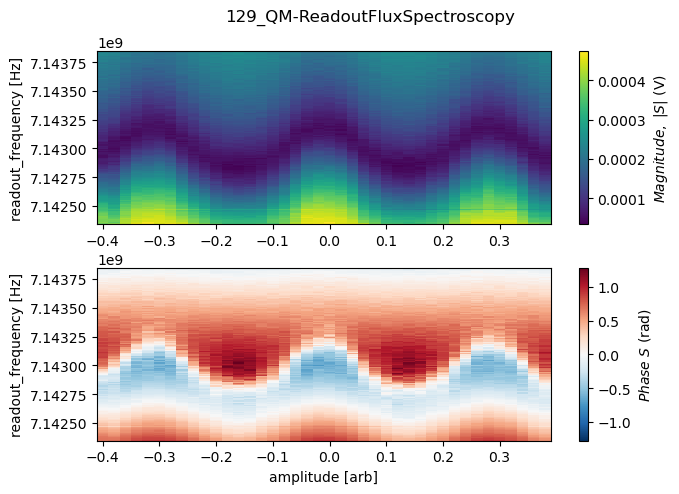

In [128]:
exp_res.mag_phase_plot(y_axis="readout_frequency")

array([ 3.05234004e-01, -5.52193116e-03,  4.92640017e+04,  7.14238849e+09])

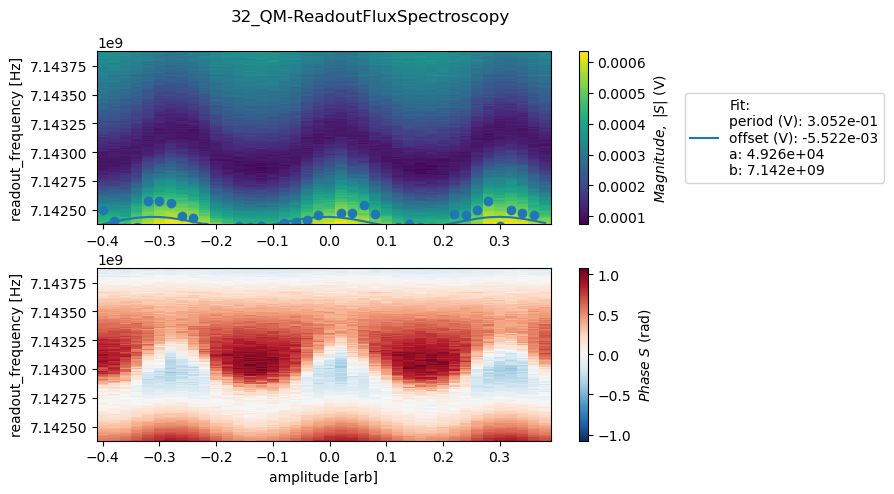

In [53]:
exp_res.analyze(p0=[0.3, 0.01, 1e6, 7.1435e9])


In [143]:
from qtl_control.qtl_simple_experiments.experiments.qubit_experiments import QubitSpectroscopy
qb_spec = QubitSpectroscopy()

f0 = 5.15e9
span = 200e6
sat_amp = 0.1
res1 = qb_spec.run("Q3", [np.arange(f0 - span/2, f0 + span/2, 0.5e6)], sat_amp=sat_amp, wait_after=50000, Navg=1024 * 2) # 0.05


2025-07-01 14:29:55,607 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 14:29:55,780 - qm - INFO     - Executing program
Execution report for job 1748815112112
No errors
Progress: [##################################################] 100.0% (n=2048/2048) --> elapsed time: 53.73s
Progress: [##################################################] 100.0% (n=2048/2048) --> elapsed time: 53.75s
Saved with ID 134


array([<Axes: ylabel='$Magnitude, \\ |S|$ (V)'>,
       <Axes: xlabel='drive_frequency [Hz]', ylabel='$Phase \\ S$ (rad)'>],
      dtype=object)

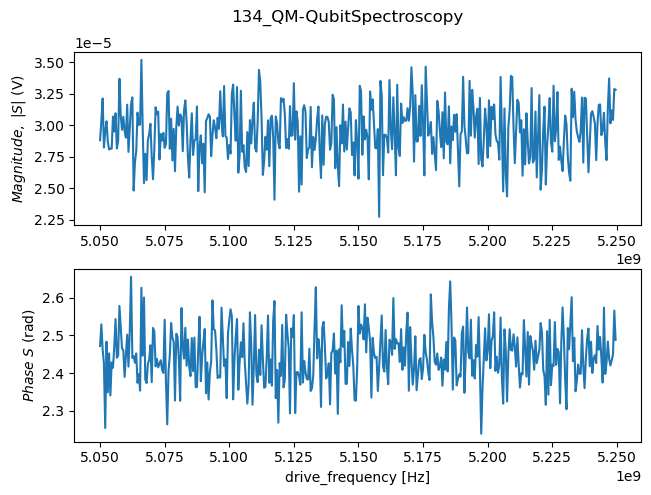

In [144]:
res1.mag_phase_plot()

array([<Axes: ylabel='$Magnitude, \\ |S|$ (V)'>,
       <Axes: xlabel='drive_frequency [Hz]', ylabel='$Phase \\ S$ (rad)'>],
      dtype=object)

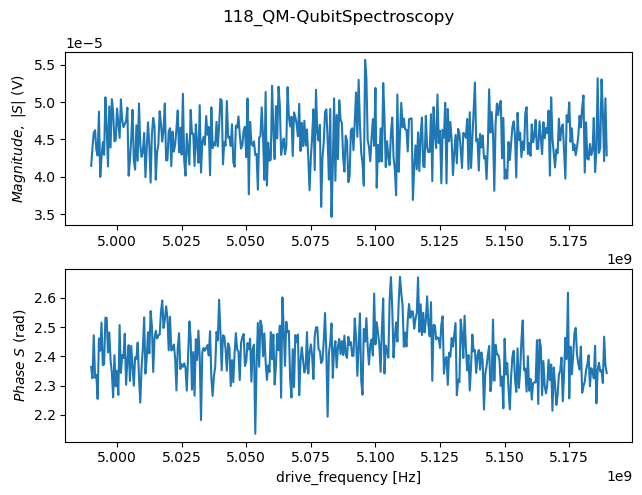

In [92]:
res1.mag_phase_plot()

In [ ]:
station.reload_config(["Q6"], {
    "Q6": {
        "frequency": 4.6131147e9,
        "drive": {
            "LO_frequency": 4800000000,
        },
        "readout_amplitude": 0.15,
        "readout_frequency": 6702766000 + 1e4,
        "X180_amplitude": 0.154386
    },
    "PL": {
        "LO_frequency": 6900000000
    }
})
from qtl_control.qtl_simple_experiments.experiments.qubit_experiments import ReadoutOptimization
ropt = ReadoutOptimization()


res = ropt.run("Q6", [
    np.arange(1, 1+1024, 1),
    np.array(["ground", "excited"]),
    np.arange(6.702766e9 - 1e6, 6.702766e9 + 1e6, 1e5),
    np.arange(0.05, 0.15, 0.01)
])


In [125]:
from qtl_control.qtl_simple_experiments.experiments.qubit_experiments import ReadoutOptimization
ropt = ReadoutOptimization()

f0 = 6.9845e9 + 1e6
N = 1024 * 4
res = ropt.run("Q3", [
    np.arange(1, 1+N, 1),
    np.arange(f0 - 1e6, f0 + 1e6, 1e5, dtype=int),
    np.arange(0.14, 0.2, 0.01),
    np.array(["ground", "excited"]),
], Navg=N)


2025-07-01 13:55:03,455 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 13:55:03,746 - qm - INFO     - Executing program
Saved with ID 128


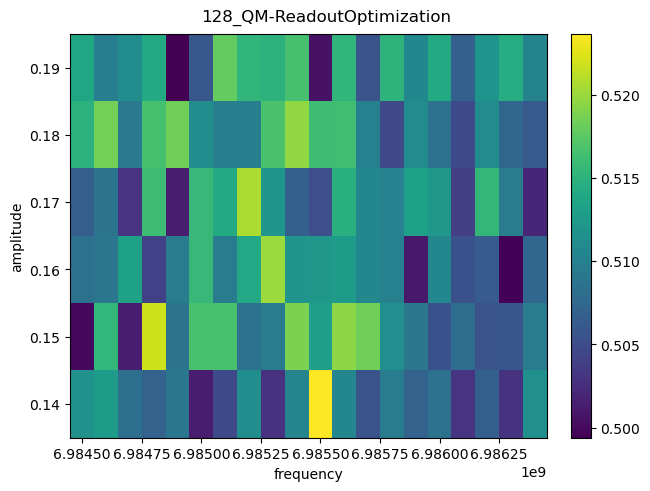

In [126]:
res.analyze()

In [130]:
from qtl_control.qtl_simple_experiments.experiments.qubit_experiments import Rabi
import numpy as np
rabi_exp = Rabi()

amp_sweep = 0.3
npts = 100
res = rabi_exp.run("Q3", [
    np.arange(-amp_sweep, amp_sweep, (amp_sweep*2)/npts)
], pulse_duration=100, Navg=1024*4, wait_after=100000)


2025-07-01 14:19:54,313 - qm - INFO     - Sending program to QOP for compilation
2025-07-01 14:19:54,508 - qm - INFO     - Executing program
Execution report for job 1748815112105
No errors
Progress: [##################################################] 100.0% (n=4096/4096) --> elapsed time: 43.18s
Progress: [##################################################] 100.0% (n=4096/4096) --> elapsed time: 43.20s
Saved with ID 130


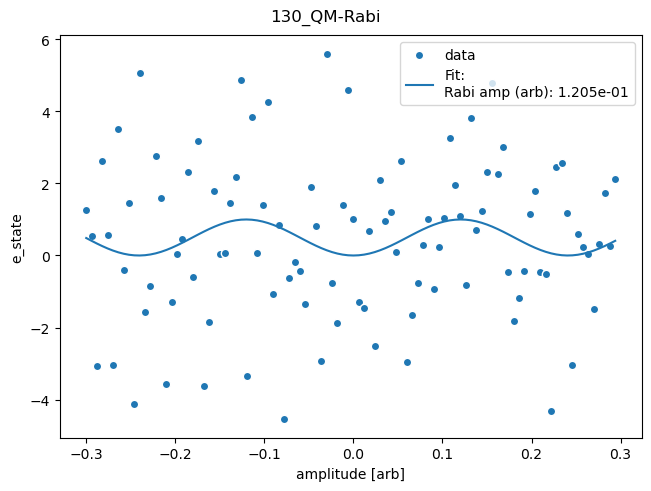

In [131]:
pi_pulse, disc0, disc1 = res.analyze(rabi_amp=0.15)

In [106]:
from qtl_control.qtl_simple_experiments.experiments.base import ExperimentResult
ExperimentResult.disc_0 = disc0
ExperimentResult.disc_1 = disc1
pi_pulse

np.float64(0.15514954015263197)

array([<Axes: ylabel='$Magnitude, \\ |S|$ (V)'>,
       <Axes: xlabel='amplitude [arb]', ylabel='$Phase \\ S$ (rad)'>],
      dtype=object)

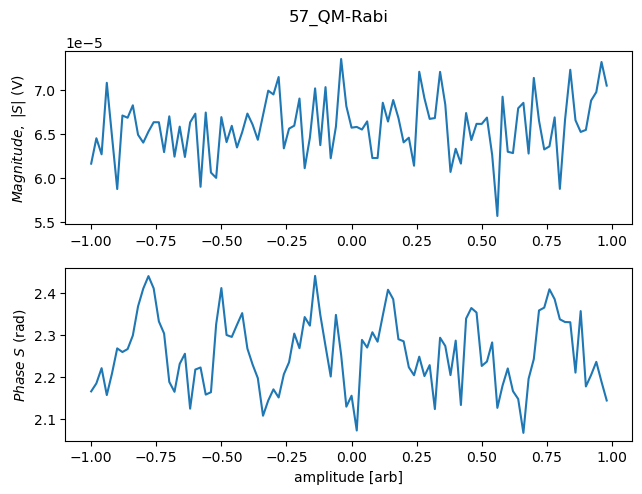

In [22]:
res.mag_phase_plot()